# face_recognition简介

face_recognition是github上一个非常著名的人脸识别开源工具包，我们可以通过pip install face_recognition指令安装到python环境内

In [2]:
# 导入工具包
import face_recognition
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

(-0.5, 511.5, 511.5, -0.5)

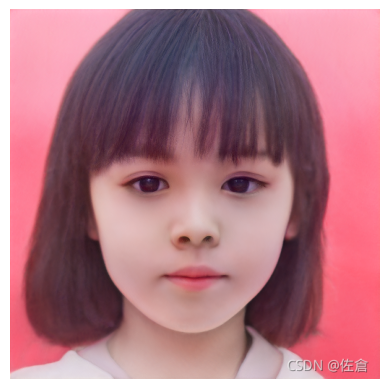

In [3]:
# 加载图片
image = face_recognition.load_image_file('test/0.png')
img = Image.fromarray(image, 'RGB')
plt.imshow(img)
plt.axis('off')

(-0.5, 267.5, 267.5, -0.5)

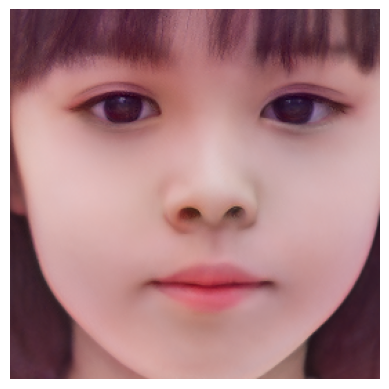

In [4]:
# 人脸检测
face_locations = face_recognition.face_locations(image)
face = image[face_locations[0][0]:face_locations[0][2], face_locations[0][3]:face_locations[0][1]]
img = Image.fromarray(face, 'RGB')
plt.imshow(img)
plt.axis('off')

In [8]:
# 人脸特征提取
face_encodings = face_recognition.face_encodings(image, face_locations)[0]
face_encodings

array([-6.56175613e-02,  3.57246287e-02, -3.25378552e-02, -1.07623756e-01,
       -1.55792654e-01, -6.92352187e-03, -9.99994278e-02, -7.29330108e-02,
        1.16828665e-01, -1.41790450e-01,  1.90907508e-01, -1.11766808e-01,
       -2.04608113e-01, -2.34458186e-02, -4.44421358e-02,  1.74416661e-01,
       -1.84427470e-01, -1.71751633e-01,  2.21990384e-02,  6.50230870e-02,
        8.52320567e-02,  3.93895917e-02, -2.73747947e-02,  1.04427606e-01,
       -1.40134901e-01, -3.95084679e-01, -1.32354319e-01, -7.75968432e-02,
       -7.88727030e-02, -4.11714241e-02, -1.41955912e-04,  8.48261267e-02,
       -1.92754030e-01, -2.68854629e-02,  4.22400311e-02,  7.57675245e-02,
       -1.63735375e-02, -9.41937044e-02,  1.26254752e-01,  3.44838612e-02,
       -3.08259785e-01,  6.08072989e-02,  1.07328005e-01,  2.79487789e-01,
        1.12232096e-01,  1.44448020e-02, -5.60511462e-03, -8.95383507e-02,
        8.01406205e-02, -1.97114348e-01, -5.93383983e-03,  1.20623142e-01,
        5.80803901e-02,  

In [9]:
# 人脸比对
img1 = 'test/1.jpeg'
img2 = 'test/2.jpeg'
img3 = 'test/3.jpeg'

img1 = face_recognition.load_image_file(img1)
img2 = face_recognition.load_image_file(img2)
img3 = face_recognition.load_image_file(img3)
encoding1 = face_recognition.face_encodings(img1)[0]
encoding2 = face_recognition.face_encodings(img2)[0]
encoding3 = face_recognition.face_encodings(img3)[0]

results = face_recognition.compare_faces([encoding1, encoding2], encoding3, tolerance=0.35)
results

[True, True]

In [23]:
# 使用余弦相似度进行人脸比对
import numpy as np

img1 = 'test/1.jpeg'
img2 = 'test/2.jpeg'

img1 = face_recognition.load_image_file(img1)
img2 = face_recognition.load_image_file(img2)

face1 = face_recognition.face_locations(img1)
face2 = face_recognition.face_locations(img2)

encoding1 = face_recognition.face_encodings(img1, face1)[0]
encoding2 = face_recognition.face_encodings(img2, face2)[0]

distance = face_recognition.face_distance([encoding1], encoding2)
print(distance)

x1 = np.array(encoding1)
x2 = np.array(encoding2)
distance = np.linalg.norm(x1-x2)    # 二范数
print(distance)
simcos = 1.0 / (1.0 + distance)     # 余弦相似度
print(simcos)

if simcos > 0.75:
    print('same person')
else:
    print('not same person')

[0.24664094]
0.24664094164388417
0.8021555899498609
same person


参考：https://blog.csdn.net/qq_38641985/article/details/121034867